In [2]:
# calculate error of forecast from 
# 10 states depmixS4 model

# import packages
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import util
import pandas as pd
from collections import Counter
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot
import numpy as np
from numpy import concatenate
import scipy 
import math
from math import sqrt
import h5py
import time
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import os

In [5]:
cwd = os.getcwd()
print(cwd)
os.chdir("C:/Users/whsu014/Documents/PhD/Data/VIEW/")

TCHDL_df = pd.read_csv("Synthetic_Data/simple_syn_combined_w_slope_test_data_2500inds.csv")
forecast_df = pd.read_csv("Synthetic_Data/simple_syn_combined_w_slope_depmix_forecast__train2500inds_1000inds.csv")
#test_flat_8q_df = pd.read_csv('Synthetic_Data/test_flat_sub_10000indsV2.csv')
#Forecast_naive = pd.read_csv('Synthetic_Data/10StateForecast_naive.csv')
print(TCHDL_df.shape)
print(forecast_df.shape)

C:\Users\Katy Lyon\Documents\William\PhD\Data\VIEW\Synthetic Data\Simple forecast
(67500, 22)
(27000, 22)


In [14]:
print(TCHDL_df.columns)
print(forecast_df.columns)
print(TCHDL_df.iloc[0:10, [2,3,4,5,6,7,20,21]])
print(forecast_df.iloc[0:10, [1,2,3,4,5,6,19,20,21]])

Index(['Unnamed: 0', 'X', 'id', 'quarter', 'ag_age', 'ag_sex', 'ag_eth',
       'pt_nzdep', 'imp_hxdiab', 'pt_tc_hdl_ratio', 'pt_bps', 'pt_bpd',
       'pt_smoke', 'imp_hxcvd', 'imp_hdl', 'imp_ldl', 'imp_tchol',
       'PH_BL_LLD_ANY', 'PH_BL_AHT_ANY', 'pt_familyhistory', 'tchdl', 'slope'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'quarter', 'ag_age', 'ag_sex', 'ag_eth', 'pt_nzdep',
       'imp_hxdiab', 'pt_tc_hdl_ratio', 'pt_bps', 'pt_bpd', 'pt_smoke',
       'imp_hxcvd', 'imp_hdl', 'imp_ldl', 'imp_tchol', 'PH_BL_LLD_ANY',
       'PH_BL_AHT_ANY', 'pt_familyhistory', 'tchdl', 'slope', 'hidden_state'],
      dtype='object')
      id  quarter    ag_age  ag_sex ag_eth  pt_nzdep     tchdl     slope
0  12500        1  4.038073       0    Chi         5  2.860481 -0.248840
1  12500        2  4.042471       0    Chi         5  2.897639  0.037159
2  12500        3  4.046850       0    Chi         5  3.030346  0.132707
3  12500        4  4.051210       0    Chi         5  3.021198 -0.009

In [12]:
TCHDL_v = TCHDL_df.iloc[0:27000, [2,3,4,5,6,7,20,21]].values
forecast_v = forecast_df.iloc[0:27000, [1,2,3,4,5,6,19,20,21]].values
true_list = []
forecast_list = []
for i in range(len(forecast_v)):
    if TCHDL_v[i, 1] > 7:
        true_list.append(TCHDL_v[i, 6])
        forecast_list.append(forecast_v[i, 6])
#true_list = TCHDL_v[:, 6].tolist()
#forecast_list = forecast_v[:, 6].tolist()
#print(true_list[0:30])
#print(forecast_list[0:30])

In [13]:
rmse_forecast = sqrt(mean_squared_error(true_list, forecast_list))
print(rmse_forecast)

1.2371054677650721


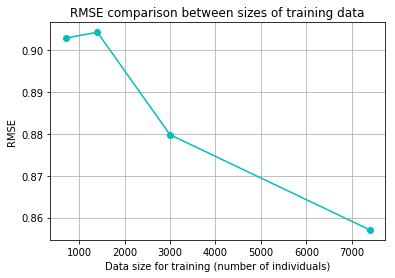

In [3]:
train_data_size = np.array([700, 1400, 3000, 7398])
rmse = np.array([0.90297, 0.90437, 0.87982, 0.85703])

fig, ax = pyplot.subplots()
ax.plot(train_data_size, rmse, 'o-', color='c')
ax.set(xlabel='Data size for training (number of individuals)',
       ylabel='RMSE', Title='RMSE comparison between sizes of training data')
ax.grid()
fig.savefig("training_data_comparison.pdf")
pyplot.show()

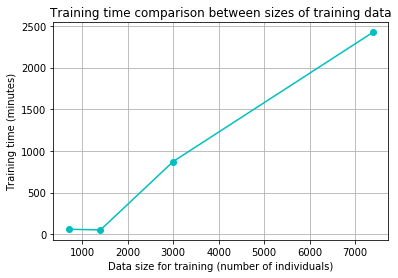

In [4]:
train_data_size = np.array([700, 1400, 3000, 7398])
training_time = np.array([58.6225, 50.51854, 872.3508, 2425.42944])
fig, ax = pyplot.subplots()
ax.plot(train_data_size, training_time, 'o-', color='c')
ax.set(xlabel='Data size for training (number of individuals)',
       ylabel='Training time (minutes)', Title='Training time comparison between sizes of training data')
ax.grid()
fig.savefig("training_time_comparison.pdf")
pyplot.show()

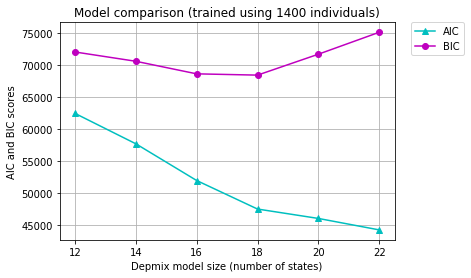

In [5]:
depmix_size = np.array([12, 14, 16, 18, 20, 22])
AIC = np.array([62436.01, 57690.63, 51955.26, 47502.08, 46034.34, 44245.18 ])
BIC = np.array([72015.89, 70563.86, 68602.11, 68402.84, 71669.29, 75094.61 ])
fig, ax = pyplot.subplots()
ax.plot(depmix_size, AIC, '^-', color='c', label="AIC")
ax.plot(depmix_size, BIC, 'o-', color='m', label="BIC")
ax.set(xlabel='Depmix model size (number of states)',
       ylabel='AIC and BIC scores', Title='Model comparison (trained using 1400 individuals)')
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig("Model_comparison.pdf")
pyplot.show()